In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format

In [2]:
df_movies = pd.read_csv('../data/movies/movies.csv')
df_links =  pd.read_csv('../data/movies/links.csv')
df_ratings =  pd.read_csv('../data/movies/ratings.csv')
df_tags =  pd.read_csv('../data/movies/tags.csv')

In [3]:
df_all_list = [df_movies, df_links, df_ratings, df_tags]
df_name_list = ['df_movies', 'df_links', 'df_ratings', 'df_tags']

In [4]:
for i, d in enumerate(df_all_list):
    print('-----------------', df_name_list[i])
    print(d.head())

----------------- df_movies
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
----------------- df_links
   movieId  imdbId    tmdbId
0        1  114709    862.00
1        2  113497  8,844.00
2        3  113228 15,602.00
3        4  114885 31,357.00
4        5  113041 11,862.00
----------------- df_ratings
   userId  movieId  rating   timestamp
0       1       31    2.50  1260759144
1       1     1029    3.00  1260759179
2       1     1061    3.00  12

In [5]:
for i, d in enumerate(df_all_list):
    print('-----------------', df_name_list[i])
    print(d.info())

----------------- df_movies
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
movieId    9125 non-null int64
title      9125 non-null object
genres     9125 non-null object
dtypes: int64(1), object(2)
memory usage: 213.9+ KB
None
----------------- df_links
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
movieId    9125 non-null int64
imdbId     9125 non-null int64
tmdbId     9112 non-null float64
dtypes: float64(1), int64(2)
memory usage: 213.9 KB
None
----------------- df_ratings
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
userId       100004 non-null int64
movieId      100004 non-null int64
rating       100004 non-null float64
timestamp    100004 non-null int64
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None
----------------- df_tags
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 t

In [6]:
for i, d in enumerate(df_all_list):
    print('-----------------', df_name_list[i])
    print(d.shape)

----------------- df_movies
(9125, 3)
----------------- df_links
(9125, 3)
----------------- df_ratings
(100004, 4)
----------------- df_tags
(1296, 4)


In [7]:
for i, d in enumerate(df_all_list):
    print('-----------------', df_name_list[i])
    for c in d.columns:
        print('  ', c, ' : ', len(d[c].unique()))

----------------- df_movies
   movieId  :  9125
   title  :  9123
   genres  :  902
----------------- df_links
   movieId  :  9125
   imdbId  :  9125
   tmdbId  :  9113
----------------- df_ratings
   userId  :  671
   movieId  :  9066
   rating  :  10
   timestamp  :  78141
----------------- df_tags
   userId  :  61
   movieId  :  689
   tag  :  582
   timestamp  :  1245


In [8]:
df_ratings = pd.merge(df_ratings, df_movies, how='left', on='movieId')

In [9]:
df_ratings.head()

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.50,1260759144,Dangerous Minds (1995),Drama
1,1,1029,3.00,1260759179,Dumbo (1941),Animation|Children|Drama|Musical
2,1,1061,3.00,1260759182,Sleepers (1996),Thriller
3,1,1129,2.00,1260759185,Escape from New York (1981),Action|Adventure|Sci-Fi|Thriller
4,1,1172,4.00,1260759205,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama


In [10]:
df_ratings['genres'] = df_ratings['genres'].str.lower()
df_ratings['Drama'] = 0
df_ratings['Comedy'] = 0
df_ratings['Romance'] = 0
df_ratings['Action'] = 0

df_ratings['Drama'][df_ratings['genres'].str.contains('drama')]=1
df_ratings['Comedy'][df_ratings['genres'].str.contains('comedy')]=1
df_ratings['Romance'][df_ratings['genres'].str.contains('romance')]=1
df_ratings['Action'][df_ratings['genres'].str.contains('action')]=1



/home/emily/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/emily/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/emily/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/emily/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithC

In [11]:
df_ratings.head()

,userId,movieId,rating,timestamp,title,genres,Drama,Comedy,Romance,Action
0,1,31,2.50,1260759144,Dangerous Minds (1995),drama,1,0,0,0
1,1,1029,3.00,1260759179,Dumbo (1941),animation|children|drama|musical,1,0,0,0
2,1,1061,3.00,1260759182,Sleepers (1996),thriller,0,0,0,0
3,1,1129,2.00,1260759185,Escape from New York (1981),action|adventure|sci-fi|thriller,0,0,0,1
4,1,1172,4.00,1260759205,Cinema Paradiso (Nuovo cinema Paradiso) (1989),drama,1,0,0,0


In [12]:
df_ratings['rating_year'] = pd.to_datetime(df_ratings['timestamp'], unit='s').dt.year
df_ratings['date'] = pd.to_datetime(df_ratings['timestamp'], unit='s')

df_ratings_users = df_ratings.groupby('userId')
df_ratings_users.count().head(5)

,movieId,rating,timestamp,title,genres,Drama,Comedy,Romance,Action,rating_year,date
userId,,,,,,,,,,,
1,20,20,20,20,20,20,20,20,20,20,20
2,76,76,76,76,76,76,76,76,76,76,76
3,51,51,51,51,51,51,51,51,51,51,51
4,204,204,204,204,204,204,204,204,204,204,204
5,100,100,100,100,100,100,100,100,100,100,100


In [13]:
df_user_info = pd.concat([pd.DataFrame(df_ratings_users.count()['rating'].rename('rating_count')), 
                         pd.DataFrame(df_ratings_users.mean()['rating'].rename('rating_average')), 
                         pd.DataFrame(df_ratings_users.min()['date'].rename('start_date')), 
                         pd.DataFrame(df_ratings_users.max()['date'].rename('most_recent_date')),
                         pd.DataFrame(df_ratings_users.sum()['Drama'].rename('Drama_Count')),
                         pd.DataFrame(df_ratings_users.sum()['Comedy'].rename('Comedy_Count')),
                         pd.DataFrame(df_ratings_users.sum()['Romance'].rename('Romance_Count')),
                         pd.DataFrame(df_ratings_users.sum()['Action'].rename('Action_Count'))], 
                         axis=1)


In [14]:
df_user_info.head()

,rating_count,rating_average,start_date,most_recent_date,Drama_Count,Comedy_Count,Romance_Count,Action_Count
userId,,,,,,,,
1,20,2.55,2009-12-14 02:51:48,2009-12-14 02:53:25,7,5,1,5
2,76,3.49,1996-06-21 11:09:55,1996-06-21 11:24:06,39,32,22,19
3,51,3.57,2011-02-28 02:53:09,2011-02-28 22:39:47,25,18,10,16
4,204,4.35,2000-02-05 19:25:14,2000-02-08 03:57:54,56,88,28,62
5,100,3.91,2006-11-12 23:10:44,2006-11-12 23:45:45,39,55,37,12


In [97]:
def genre_average_rating(df, df_to_join, genre):
    df_group = df[df['genres'].str.contains(genre)].groupby(['userId'])
    df_group.mean()['rating']
    df_new = pd.DataFrame(df_group.mean()['rating'].rename('rating_average_%s' % genre))
    return df_to_join.merge(df_new, on='userId')

df_user_info = genre_average_rating(df_ratings, df_user_info, 'drama')
df_user_info = genre_average_rating(df_ratings, df_user_info, 'comedy')
df_user_info = genre_average_rating(df_ratings, df_user_info, 'romance')
df_user_info = genre_average_rating(df_ratings, df_user_info, 'action')
df_user_info.head()

,rating_count,rating_average,start_date,most_recent_date,Drama_Count,Comedy_Count,Romance_Count,Action_Count,rating_average_drama,rating_average_comedy,rating_average_romance,rating_average_action
userId,,,,,,,,,,,,
1,20,2.55,2009-12-14 02:51:48,2009-12-14 02:53:25,7,5,1,5,2.57,2.00,3.50,2.80
2,76,3.49,1996-06-21 11:09:55,1996-06-21 11:24:06,39,32,22,19,3.62,3.09,3.59,3.32
3,51,3.57,2011-02-28 02:53:09,2011-02-28 22:39:47,25,18,10,16,3.92,3.61,3.65,3.47
4,204,4.35,2000-02-05 19:25:14,2000-02-08 03:57:54,56,88,28,62,4.46,4.33,4.50,4.27
5,100,3.91,2006-11-12 23:10:44,2006-11-12 23:45:45,39,55,37,12,3.81,3.98,4.08,4.00


In [16]:
df_ratings[df_ratings['userId']==4].sort_values('date')

,userId,movieId,rating,timestamp,title,genres,Drama,Comedy,Romance,Action,rating_year,date
315,4,2734,4.00,949778714,"Mosquito Coast, The (1986)",adventure|drama|thriller,1,0,0,0,2000,2000-02-05 19:25:14
208,4,1210,5.00,949778714,Star Wars: Episode VI - Return of the Jedi (1983),action|adventure|sci-fi,0,0,0,1,2000,2000-02-05 19:25:14
262,4,2018,5.00,949778771,Bambi (1942),animation|children|drama,1,0,0,0,2000,2000-02-05 19:26:11
197,4,1097,5.00,949778771,E.T. the Extra-Terrestrial (1982),children|drama|sci-fi,1,0,0,0,2000,2000-02-05 19:26:11
155,4,289,4.00,949778802,Only You (1994),comedy|romance,0,1,1,0,2000,2000-02-05 19:26:42
344,4,3208,2.00,949778946,Loaded Weapon 1 (National Lampoon's Loaded Wea...,action|comedy,0,1,0,1,2000,2000-02-05 19:29:06
180,4,858,5.00,949779022,"Godfather, The (1972)",crime|drama,1,0,0,0,2000,2000-02-05 19:30:22
154,4,260,5.00,949779042,Star Wars: Episode IV - A New Hope (1977),action|adventure|sci-fi,0,0,0,1,2000,2000-02-05 19:30:42
172,4,541,5.00,949779091,Blade Runner (1982),action|sci-fi|thriller,0,0,0,1,2000,2000-02-05 19:31:31
211,4,1219,5.00,949779173,Psycho (1960),crime|horror,0,0,0,0,2000,2000-02-05 19:32:53


''

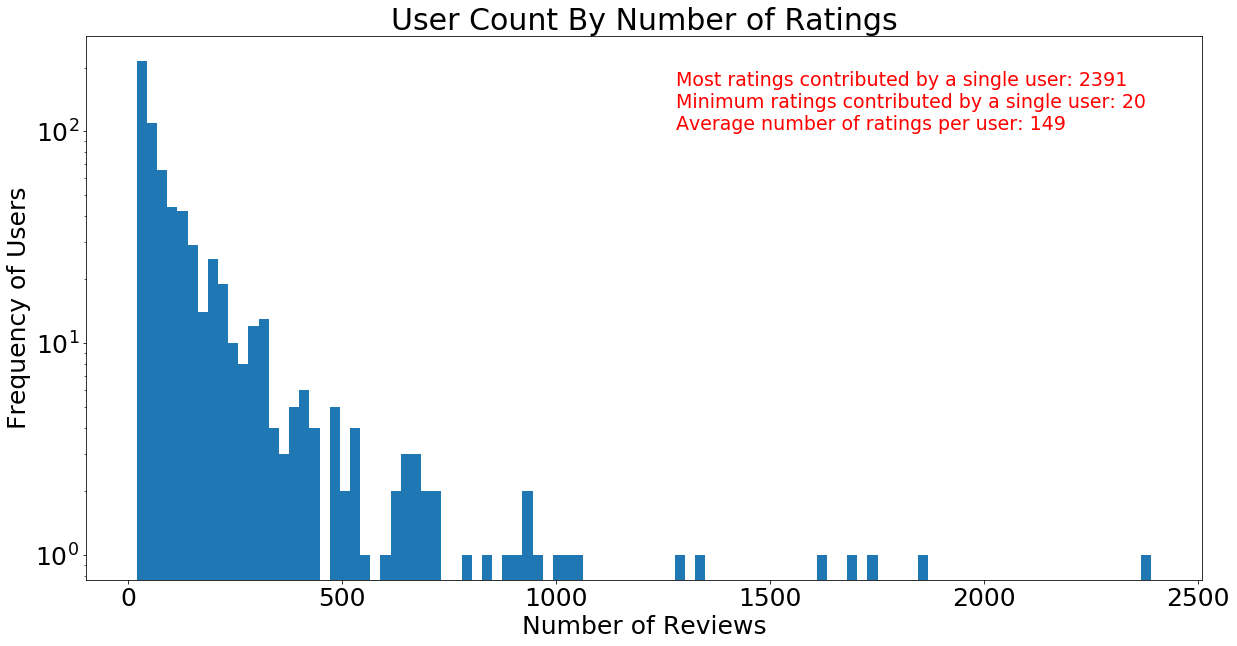

In [17]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 25})
plt.hist(df_ratings_users.count()['rating'], bins=100)
plt.title('User Count By Number of Ratings')
info_text = f"""
Most ratings contributed by a single user: {np.max(df_ratings_users.count()['rating'])}
Minimum ratings contributed by a single user: {np.min(df_ratings_users.count()['rating'])}
Average number of ratings per user: {int(np.mean(df_ratings_users.count()['rating']))}
"""
plt.annotate(info_text, (1280, 80), size=19, color='r')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency of Users')
#ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'));
plt.yscale('log');
plt.savefig('../imgs/user_count_by_number_of_ratings.png')
;

In [18]:
df_rating_ag = pd.concat([pd.DataFrame(df_ratings_users.count()['rating'].rename('rating_count')), 
                         pd.DataFrame(df_ratings_users.mean()['rating'].rename('rating_average'))], axis=1)

In [19]:
len(df_rating_ag[df_rating_ag['rating_average']>4.0])

153

In [20]:
def bin_ratings(row):
    if row <= 1:
        return '0-1'
    elif row <=2:
        return '1-2'
    elif row <= 3:
        return '2-3'
    elif row <= 4:
        return '3-4'
    else:
        return '4-5'
df_rating_ag['bin_rating'] = df_rating_ag['rating_average'].apply(bin_ratings)

2-3
3-4
4-5
1-2


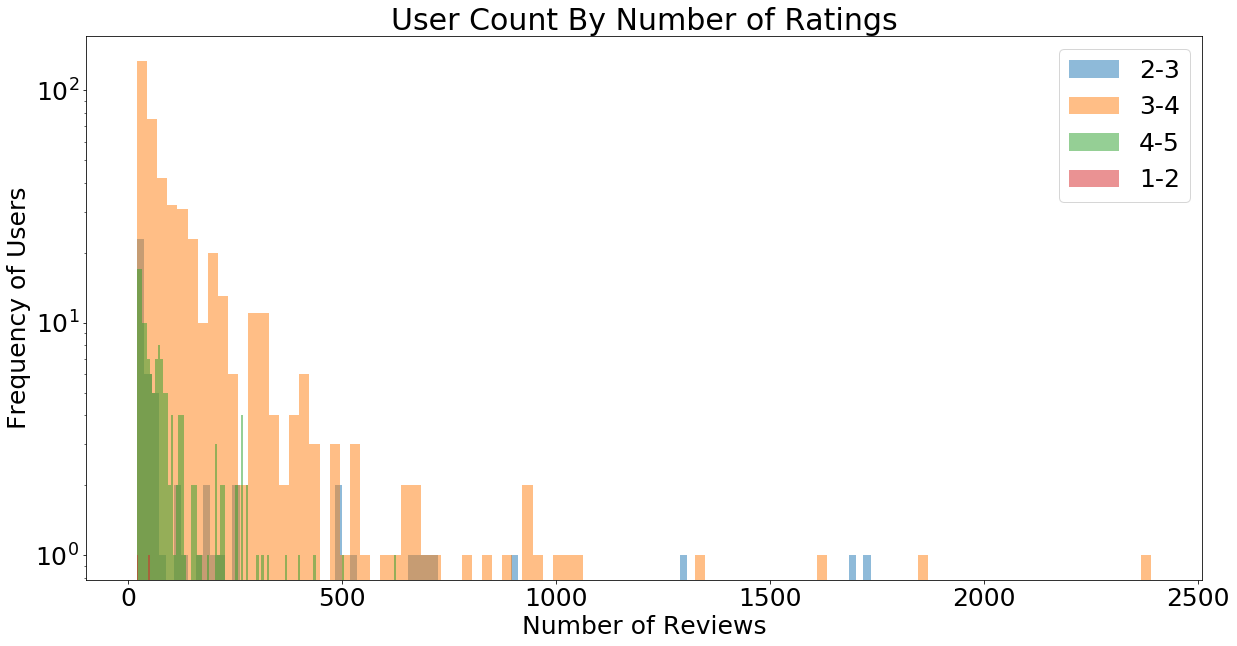

In [154]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 25})

for u in df_rating_ag['bin_rating'].unique():
    print (u)
    
    plt.hist(df_rating_ag['rating_count'][df_rating_ag['bin_rating']==u],alpha=0.5,  bins=100, label= u)

    plt.title('User Count By Number of Ratings')

plt.xlabel('Number of Reviews')
plt.ylabel('Frequency of Users')
#ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'));
plt.legend(loc='upper right')
plt.yscale('log');

In [ ]:

fig, ax = plt.subplots(3,2, figsize=(50, 50))
count = 0
matrix = np.array(list(range(0,6))).reshape(3,2)

for c in col_order_by_count:
    #df_sub_tables_pivot.boxplot(c, by='reservoir', figsize=(12,5))
    try:
        x, y = np.where(matrix == count)
        sns.boxplot(y='reservoir', y=c,ax=ax[x[0],y[0]], data=df_compounds_pivot, order=['Niobrara', 'Codell', 'Greenhorn'])
        count+=1
    except:
        pass

fig.savefig('box_plots_of_differences.png')

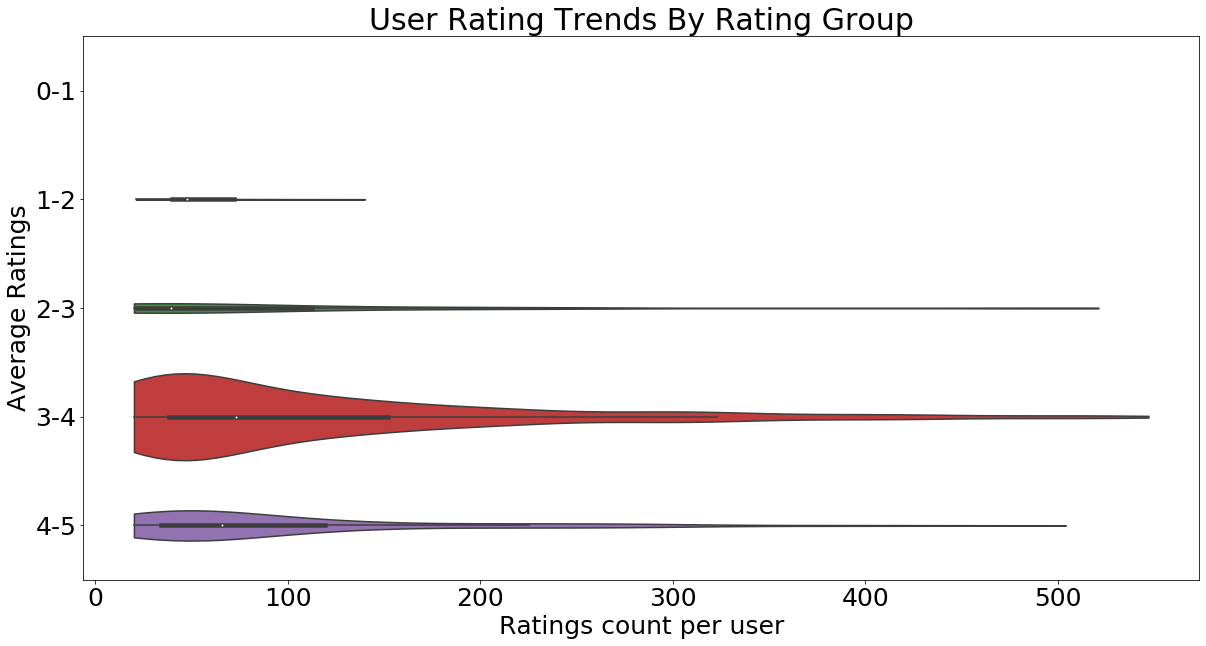

In [39]:
fig, ax = plt.subplots(1,1, figsize=(20, 10))
col_order = ['0-1', '1-2', '2-3','3-4', '4-5']

sns.violinplot(x='rating_count', y='bin_rating', data=df_rating_ag[df_rating_ag['rating_count']<600], cut=0, scale="count", order=col_order)
plt.title('User Rating Trends By Rating Group')
plt.xlabel('Ratings count per user')
plt.ylabel('Average Ratings')
fig.savefig('../imgs/violin_plot.png')

In [43]:
df_rating_ag.groupby('bin_rating').count()['rating_count']/len(df_rating_ag)

bin_rating
1-2   0.01
2-3   0.08
3-4   0.68
4-5   0.23
Name: rating_count, dtype: float64

TypeError: only size-1 arrays can be converted to Python scalars

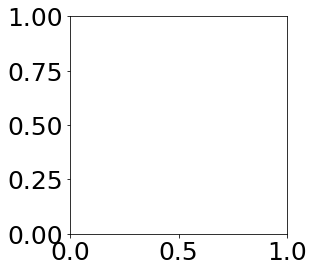

In [30]:
plt.pie(df_rating_ag.groupby(['bin_rating']).count(), autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)

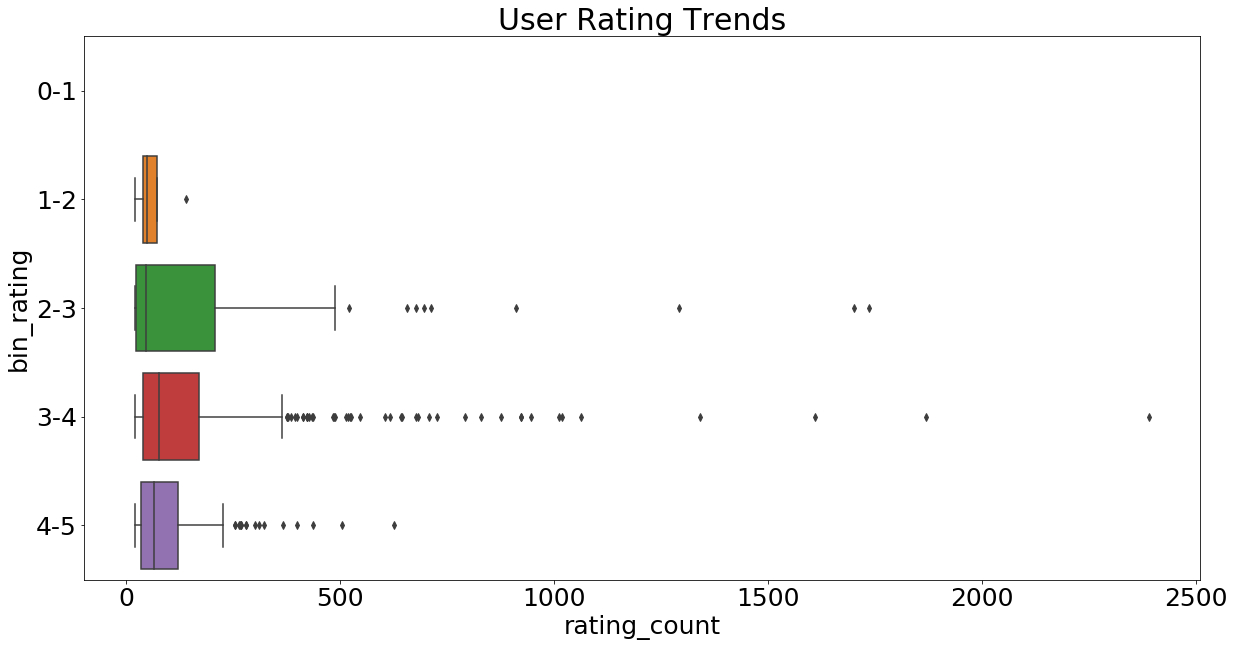

In [182]:
fig, ax = plt.subplots(1,1, figsize=(20, 10))
col_order = ['0-1', '1-2', '2-3','3-4', '4-5']

sns.boxplot(x='rating_count', y='bin_rating', data=df_rating_ag, order=col_order)
plt.title('User Rating Trends')
fig.savefig('box_plot.png')

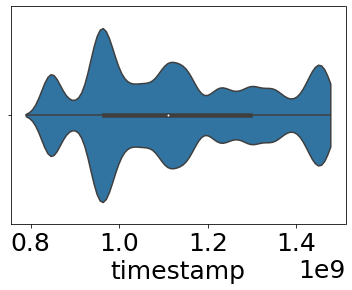

In [226]:
sns.violinplot(x='timestamp', data=df_ratings, cut=0, scale="count")